# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("iris.csv")



In [0]:
# (Q) how many data-points and features?
print (iris.shape)

(150, 5)


In [0]:
#(Q) What are the column names in our dataset?
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [0]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

iris["species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

# (3.2) 2-D Scatter Plot

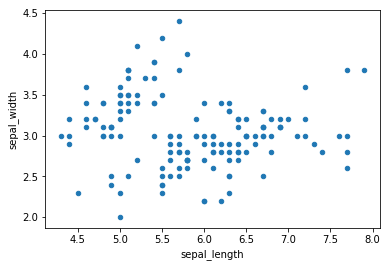

In [0]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

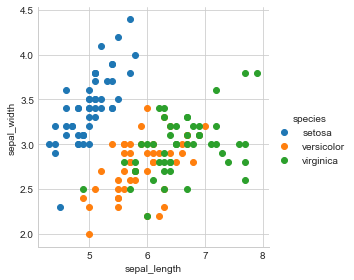

In [0]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  (3.3) Pair-plot

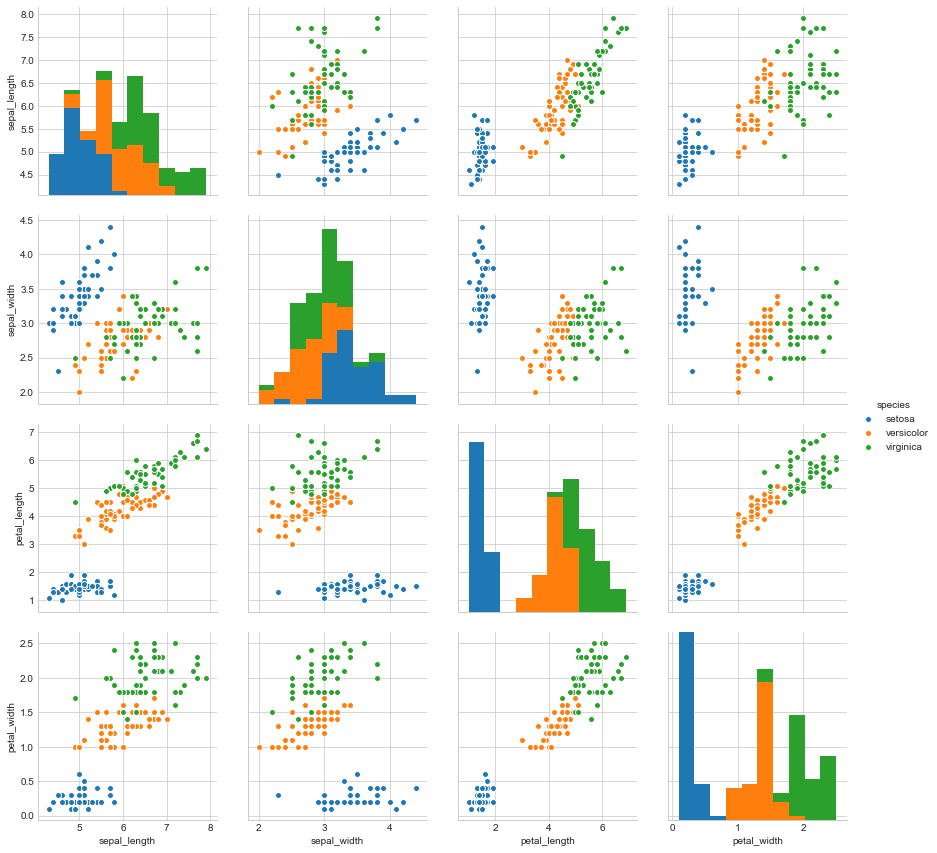

In [0]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# (3.4) Histogram, PDF, CDF

In [29]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

NameError: name 'iris' is not defined

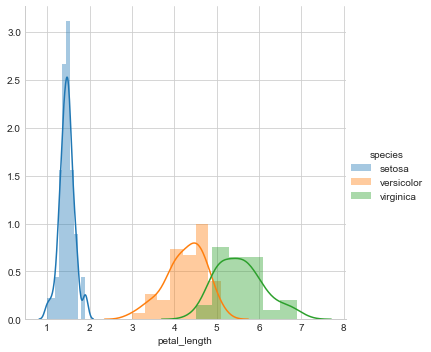

In [0]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();



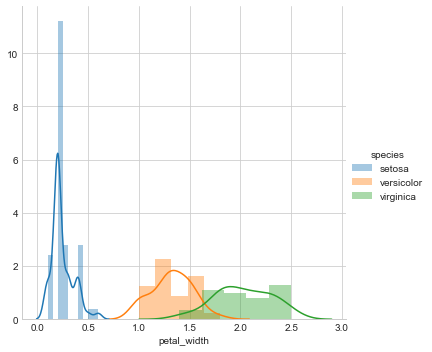

In [0]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

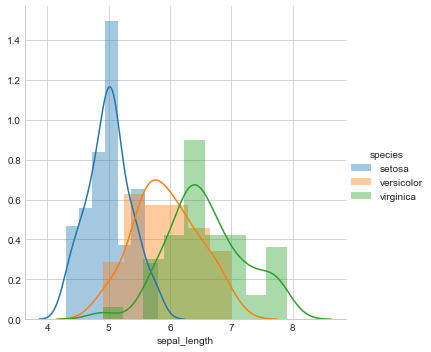

In [0]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

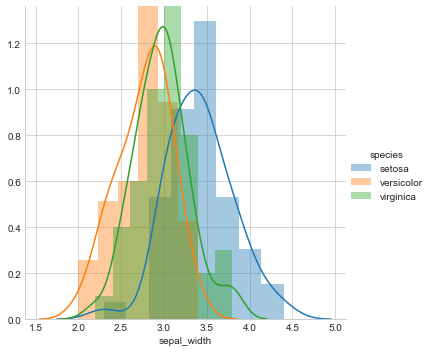

In [0]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

[ 0.02  0.02  0.04  0.14  0.24  0.28  0.14  0.08  0.    0.04]
[ 1.    1.09  1.18  1.27  1.36  1.45  1.54  1.63  1.72  1.81  1.9 ]


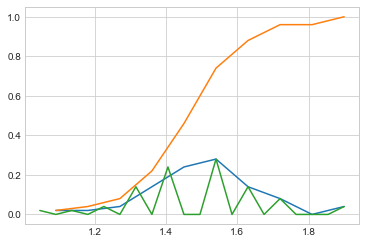

In [0]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[ 0.02  0.02  0.04  0.14  0.24  0.28  0.14  0.08  0.    0.04]
[ 1.    1.09  1.18  1.27  1.36  1.45  1.54  1.63  1.72  1.81  1.9 ]


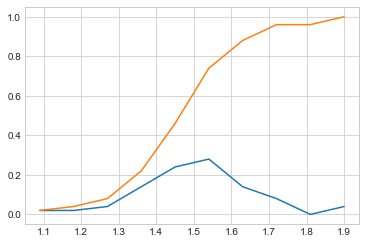

In [0]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[ 0.02  0.02  0.04  0.14  0.24  0.28  0.14  0.08  0.    0.04]
[ 1.    1.09  1.18  1.27  1.36  1.45  1.54  1.63  1.72  1.81  1.9 ]
[ 0.02  0.1   0.24  0.08  0.18  0.16  0.1   0.04  0.02  0.06]
[ 4.5   4.74  4.98  5.22  5.46  5.7   5.94  6.18  6.42  6.66  6.9 ]
[ 0.02  0.04  0.06  0.04  0.16  0.14  0.12  0.2   0.14  0.08]
[ 3.    3.21  3.42  3.63  3.84  4.05  4.26  4.47  4.68  4.89  5.1 ]


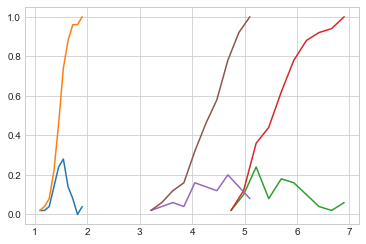

In [0]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# (3.5) Mean, Variance and Std-dev

In [0]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))





Means:
1.464
2.41568627451
5.552
4.26

Std-dev:
0.171767284429
0.546347874527
0.465188133985


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [0]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[ 1.     1.4    1.5    1.575]
[ 4.5    5.1    5.55   5.875]
[ 3.    4.    4.35  4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.148260221851
0.667170998328
0.518910776477


# (3.7) Box plot and Whiskers

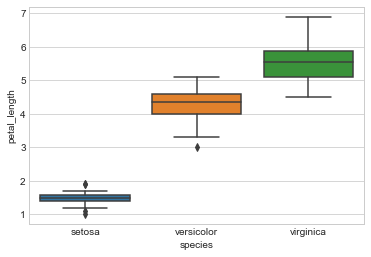

In [0]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

# (3.8) Violin plots

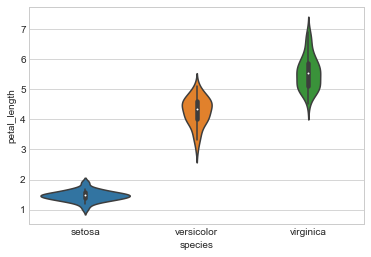

In [0]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

# (3.9) Summarizing plots in english
* Exaplain your findings/conclusions in plain english
* Never forget your objective (the probelm you are solving) . Perform all of your EDA aligned with your objectives.

# (3.10) Univariate, bivariate and multivariate analysis.

In [0]:


Def: Univariate, Bivariate and Multivariate analysis.


SyntaxError: invalid syntax (<ipython-input-20-f25211abae88>, line 3)

# (3.11) Multivariate probability density, contour plot.


In [0]:
#2D Density plot, contors-plot
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();


In [1]:
iris_virginica_SW = iris_virginica.iloc[:,1]
iris_versicolor_SW = iris_versicolor.iloc[:,1]



NameError: name 'iris_virginica' is not defined

In [0]:
from scipy import stats
stats.ks_2samp(iris_virginica_SW, iris_versicolor_SW)


In [0]:
x = stats.norm.rvs(loc=0.2, size=10)
stats.kstest(x,'norm')


In [0]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm')


In [0]:
x = stats.norm.rvs(loc=0.2, size=1000)
stats.kstest(x,'norm')


<h1>Haberman dataset analysis</h1>

<b>Objectives:</b><br>
1.To analyze the data provided and classify the cancer patients.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

haber=pd.read_csv("haberman.csv")

haber.columns=['age','year','nodes','status']

haber.head(10)


,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [4]:
haber.tail()

,age,year,nodes,status
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [5]:
#number of datapoints in our given haberman dataframe
print(len(haber))

305


In [6]:
#the dimensions of our given dataframe
print(haber.shape)

(305, 4)


In [7]:
#the columns in our haberman dataset and the type of the object
print(haber.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


<h2>2D Scatter Plot</h2>


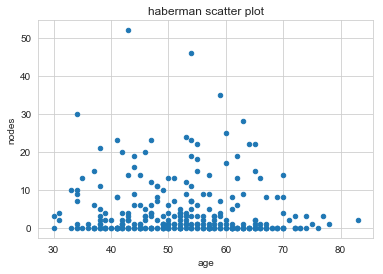

In [8]:
#plotting the scatter plot for showing how nodes vary according to age
haber.plot(kind="scatter", x="age",y="nodes")
plt.title("haberman scatter plot")
plt.show()
#below is the plot of the same

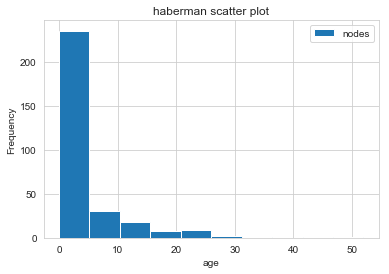

In [11]:
#plotting the histogram plot for showing how nodes vary according to age
haber.plot(kind="hist", x="age",y="nodes")
plt.xlabel('age')
plt.title("haberman scatter plot")
plt.show()
#below is the plot of the same

<b>Observations:</b><br>
1.The data appears to be scattered slighly to the left. Which means the younger age group are the least affected.

<h3>Haberman on seaborn</h3>

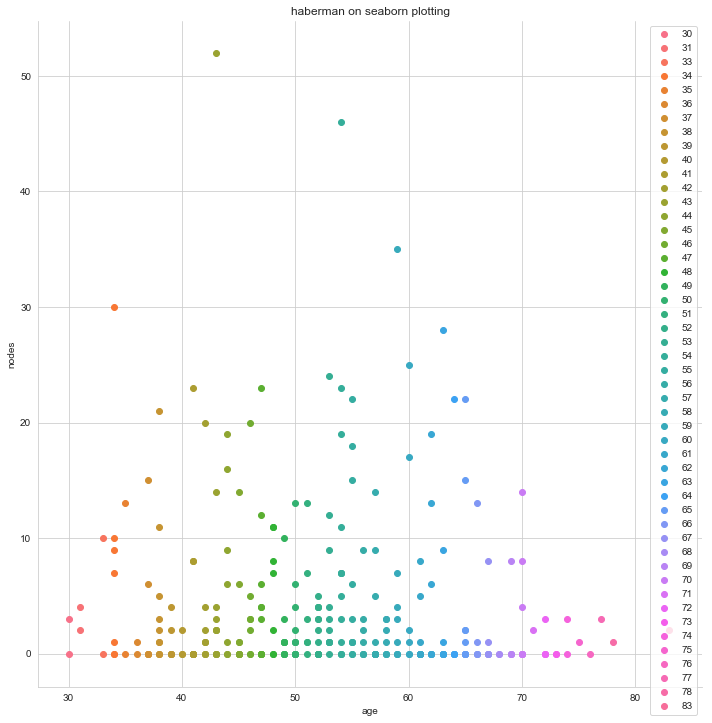

In [12]:
#let us plot a more elaborative graph using seaborn
#plotting using the seaborn. allows us for a more informative analysis of the data provided
import seaborn as sns
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="age", height=10) \
   .map(plt.scatter, "age", "nodes");
plt.legend(loc="best");
plt.title("haberman on seaborn plotting")
plt.show();

<b>Observations:</b><br>
1.Heigher age group people(70-80) seem to have lesser node value.<br>
2.age group from 40-44 seems to have heighest node value.<br>
3.The plot most closely aligns with the gaussian curve.<br>

<h2>3-D Scatter plotting</h2>

<h3>pair-plots</h3>

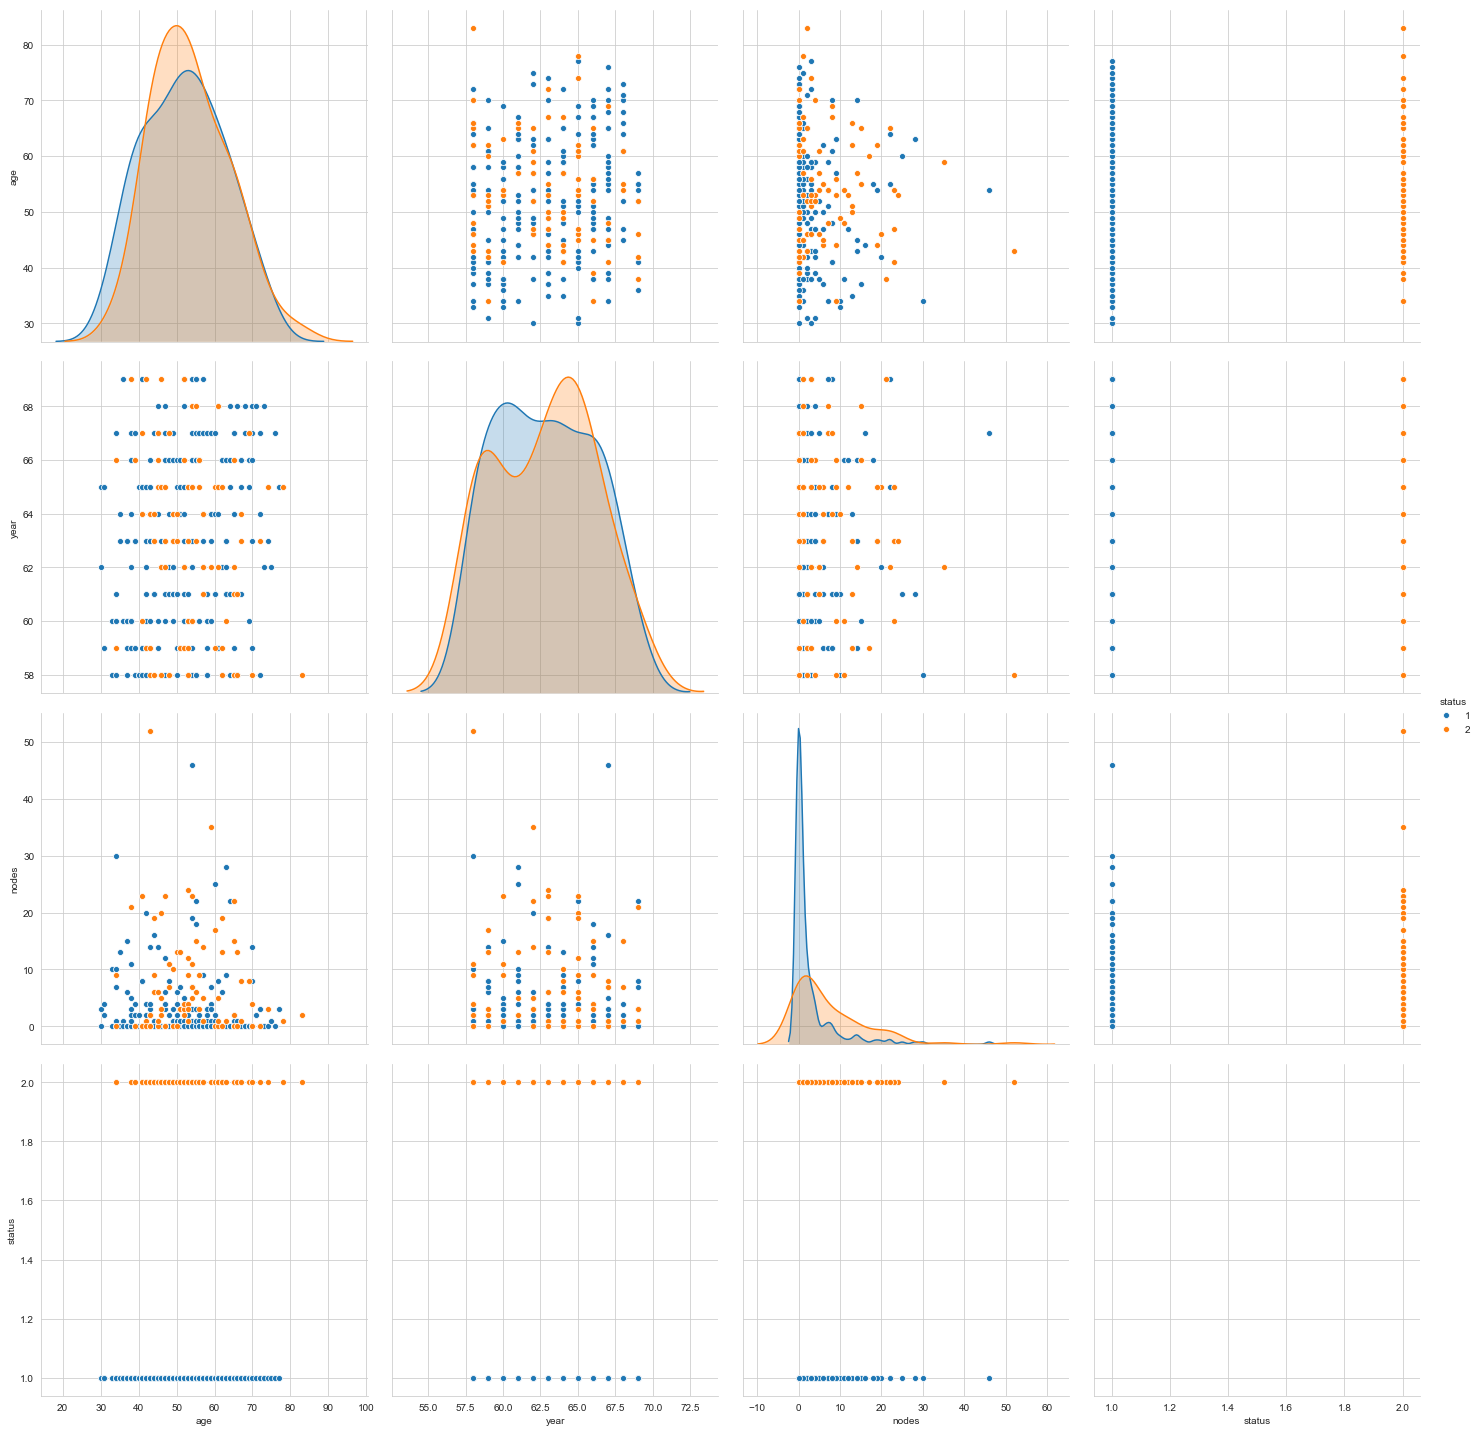

In [28]:
#pairwise scatter plotting for the haberman dataset
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haber, hue="status", height=5);
plt.show()


<b>Observations:</b><br>
1.The plots having status as y-axis and year as x-axis seems to most clearly separate the given datapoints.<br>
2.The age, nodes combination seems to be the worst of all the graphs.


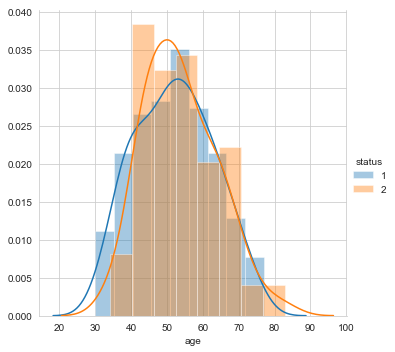

In [14]:
#now let's see some of the plot of haberman on seaborn plots 
sns.FacetGrid(haber, hue="", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

<b>Observation:</b><br>
1.If age is taken into consideration then the orange curve and blue curve almosts overlaps.

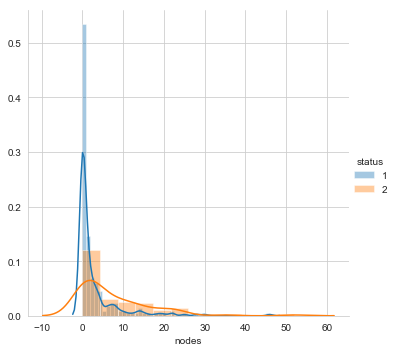

In [35]:
#now let's see for the nodes 
sns.FacetGrid(haber, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

<b>Observations:</b><br>
1.The graph for nodes as x axis is skewing towards left that means most of them has a status of 1.

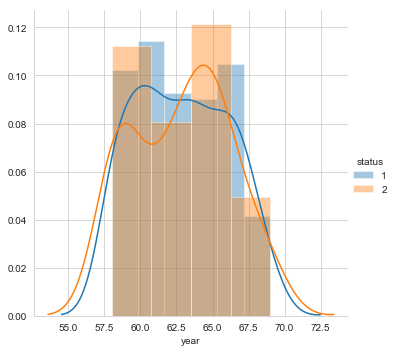

In [36]:
#now let's see for year
sns.FacetGrid(haber, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

<b>Observation:</b><br>
1.The graph above shows two highs in plot that means that around age=60 there is high probability that status 1 will be shown and around age=65 again the status=2 will show up.<br>
2.Other than that almost the two plots overlap on each other.

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
*************************************
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


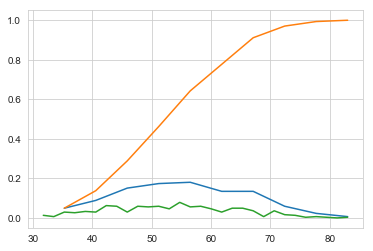

In [19]:
#creating the cdf plot for the haberman dataset.
counts, bin_edges = np.histogram(haber['age'], bins=10, 
                                 density = True)
#pdf value of the dataset
pdf = counts/(sum(counts))
print(pdf);
print("*************************************");
print(bin_edges);

#cumulative sum of the pdf graph is shown by cdf 
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

#let's first check with age again with different bin size
counts, bin_edges = np.histogram(haber['age'], bins=30, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

<b>Observations:</b><br>
1.We can see that the cdf graph quickly increase from the age group of 40-70 and then gradually flattens out.<br>
2.when the bin size was 10 the graph moves up a little at age 50-55 and then quickly goes down indicating less number of people in that category.<br>

<h2>Box-plot for haberman</h2>

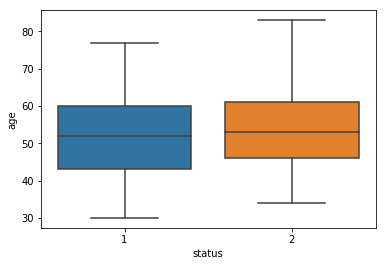

In [7]:
#let's see if the boxplot can show more detailed explanation of how the cancer survivors have fared as they age.
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="status",y="age",data=haber,whis=1.5)
plt.show()

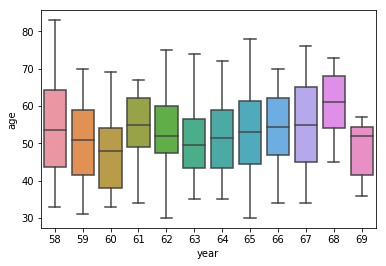

In [10]:
#plotting graph for age vs year. we can see that there is no any continous correlation between the year and the age group taken
sns.boxplot(x="year",y="age",data=haber,whis=1.5)
plt.show()

<b>Observations</b><br>
1.In the boxplot plotting method too, we can see that the age vs status plot fares well. It is easier for us to understand how where the median and the mean of the distribution of the survivors and victims are scattered.<br>
2.Secondly, the age vs year plot makes it difficult for us to classify how the cancer survivors are being distributed and to arrive at a final conclusion.


<h2>Violin Plots for haberman</h2>

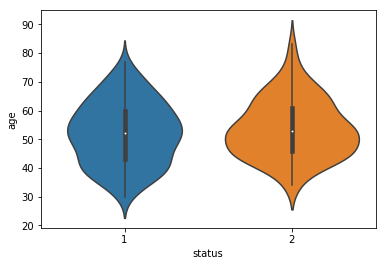

In [18]:
#plotting the violin plot for age vs status with size of block being 10
sns.violinplot(x="status",y="age",data=haber, size=10)
plt.show()

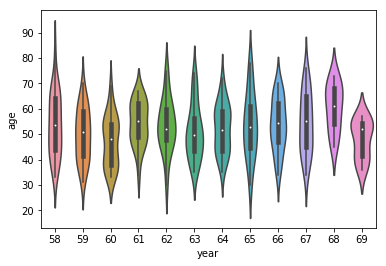

In [12]:
sns.violinplot(x="year",y="age",data=haber, size=10)
plt.show()

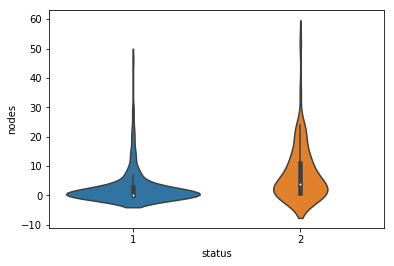

In [15]:
sns.violinplot(x="status",y="nodes",data=haber, size=6)
plt.show()

<b>Observations:</b><br>
1.We can see that age vs status graph provides the most clear picture of how the age is distributed across the two status.<br>
2.We can see that the age vs year provides multiple violin plots across years making it difficult to realize how the cancer survivor's age is spread amongst the years.



<h3>Conclusion:</h3>

1.The age vs status classification in almost every graph seems to be working the best.<br>
2.The age group (50-60) seems to be the most effected and this age group peaks in every graph we plot.